# <span style="color:skyblue">Data Preperation</span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:\\Dell\\prodigy_task_3\\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [7]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
data=df[~df.duplicated()]

# <span style="color:skyblue">Exploratory Data Analysis 🎨</span> 

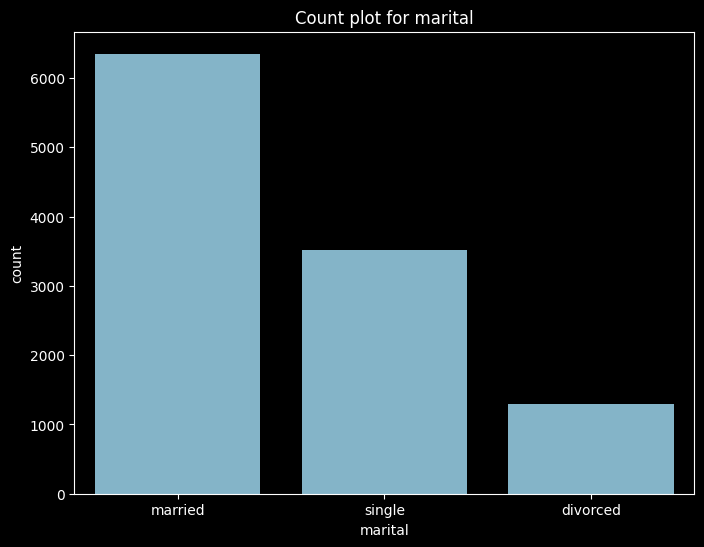

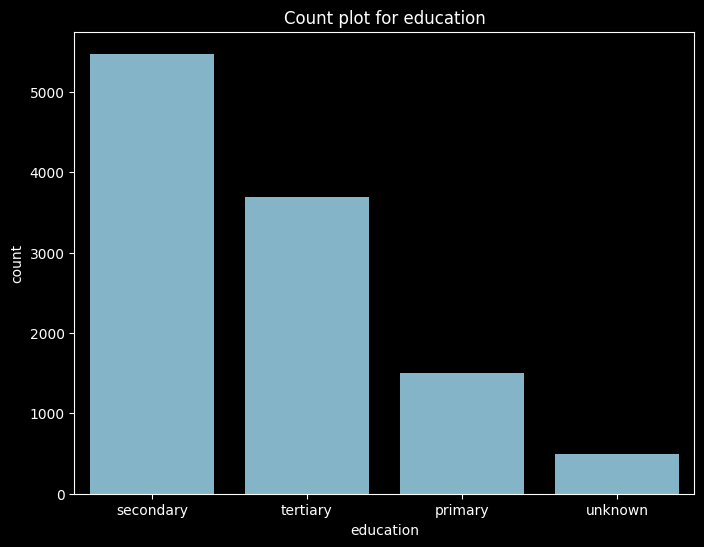

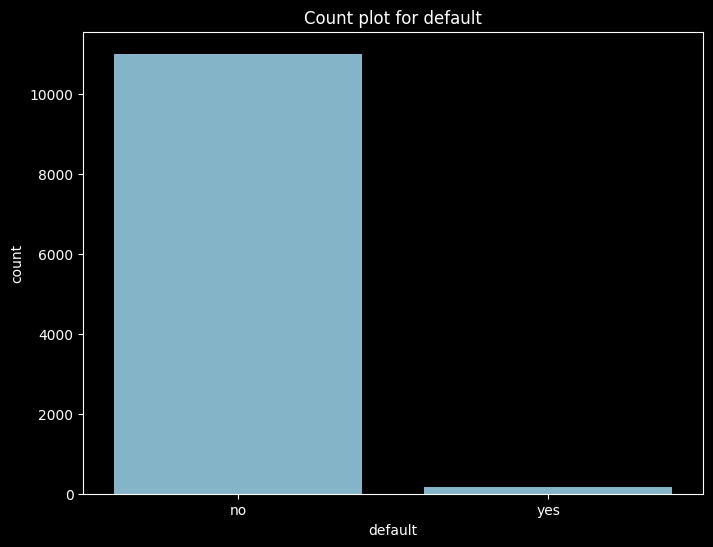

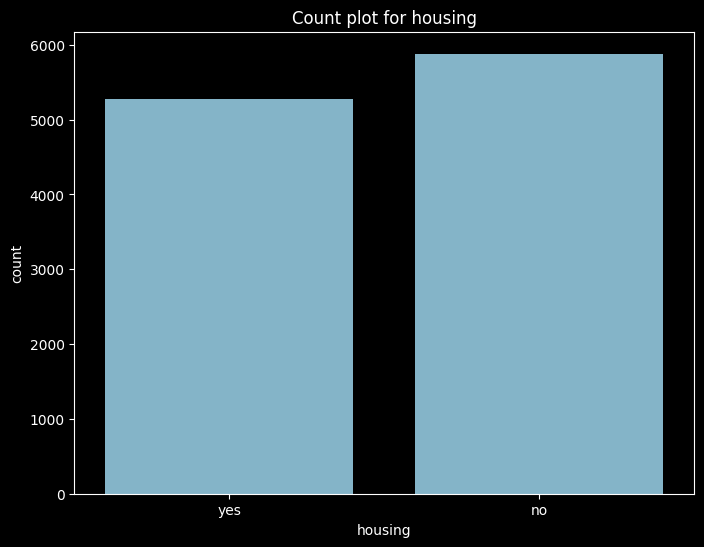

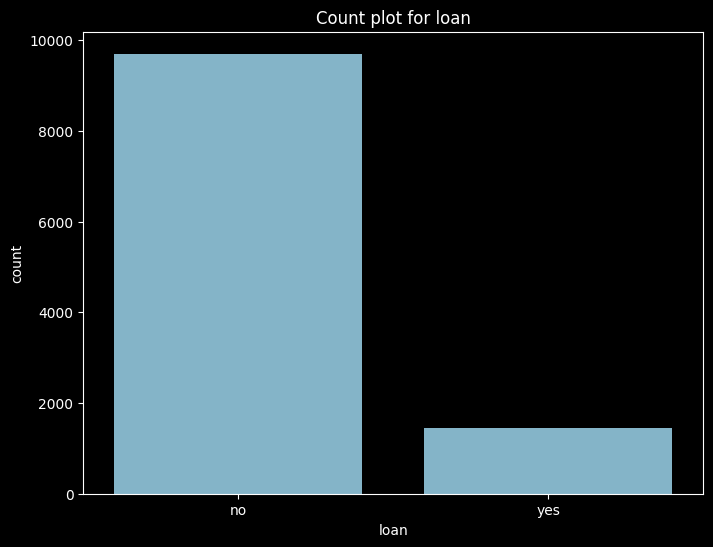

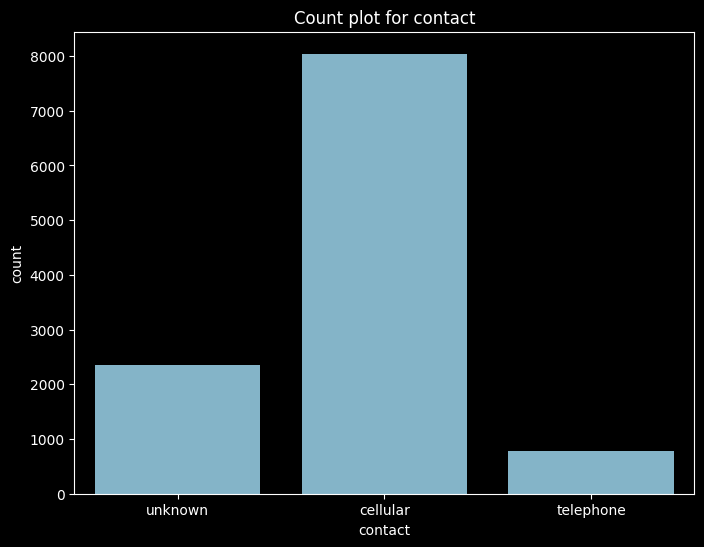

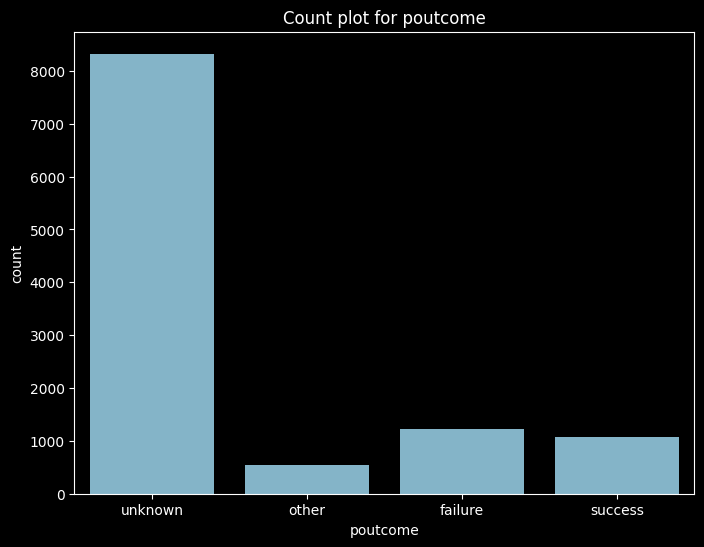

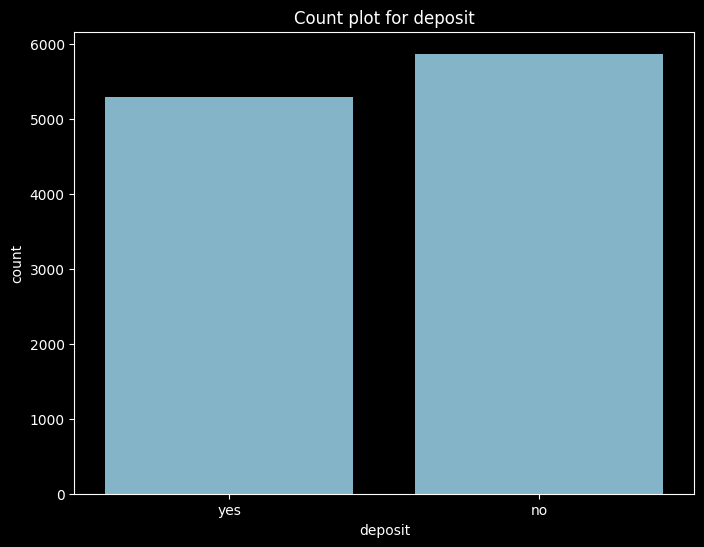

In [11]:
for col in df.columns:
    if df[col].dtype == "object":
        if col == "job" or col == "month":
            continue
        df[col].value_counts()
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df,color='skyblue',alpha=.9)
        plt.title(f'Count plot for {col}')
        plt.style.use('dark_background')
        plt.show()

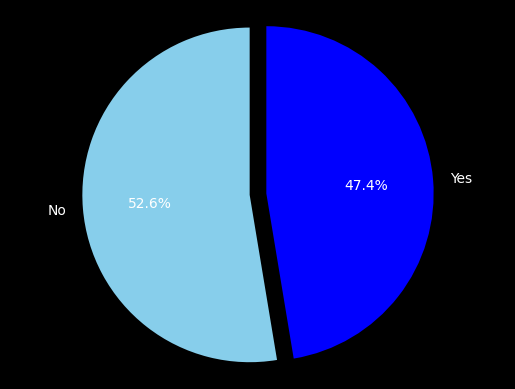

In [12]:
plt.pie(df['deposit'].value_counts(),labels=['No', 'Yes'],
         autopct='%1.1f%%', startangle=90,
         colors=['skyblue', 'blue'],
         explode = (0.1, 0))

plt.axis('equal') 
plt.style.use('dark_background') 
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


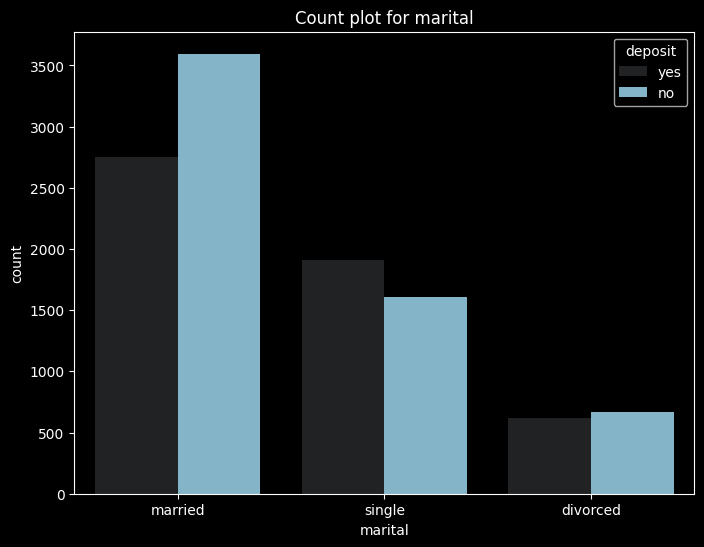

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


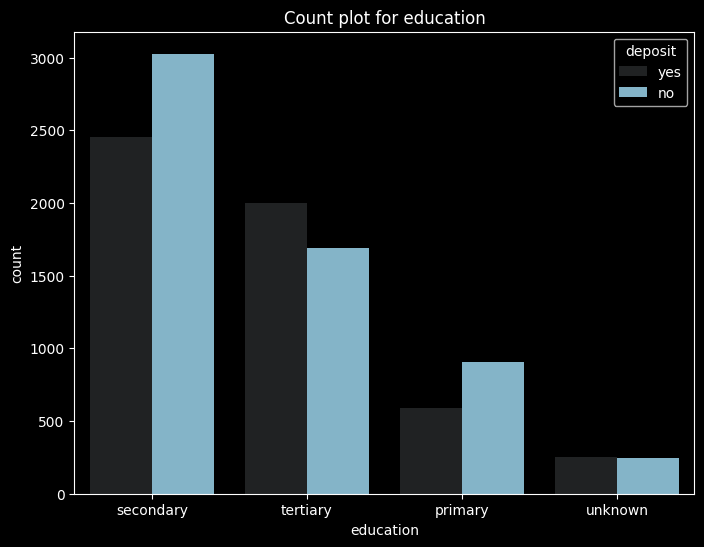

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


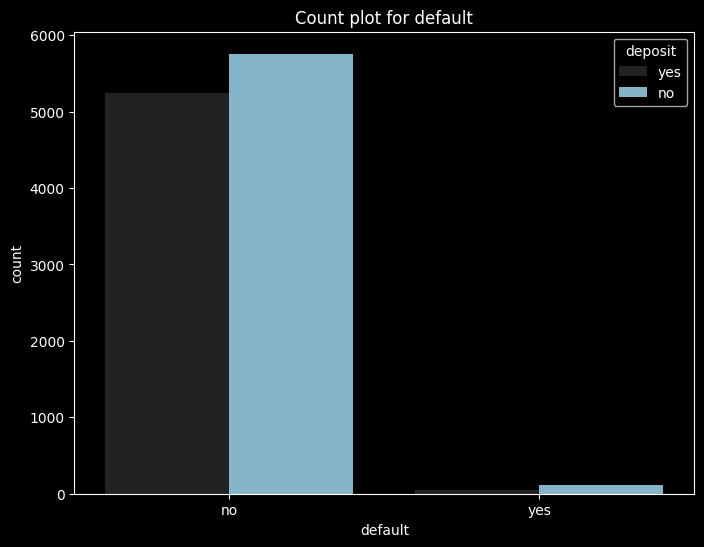

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


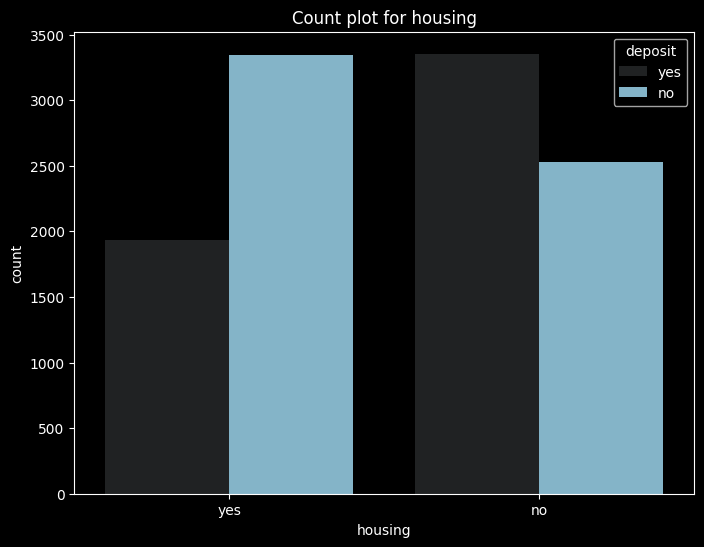

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


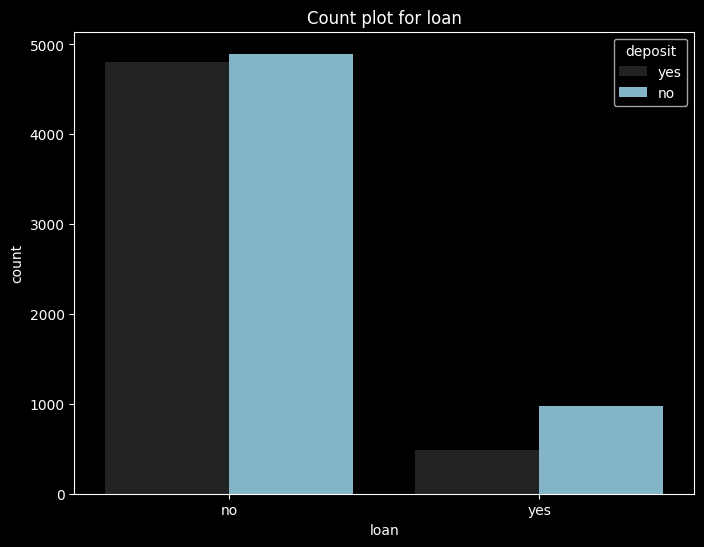

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


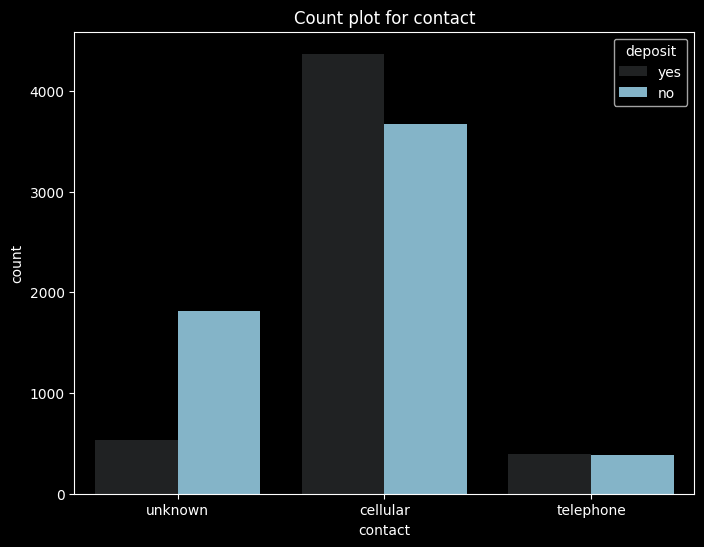

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


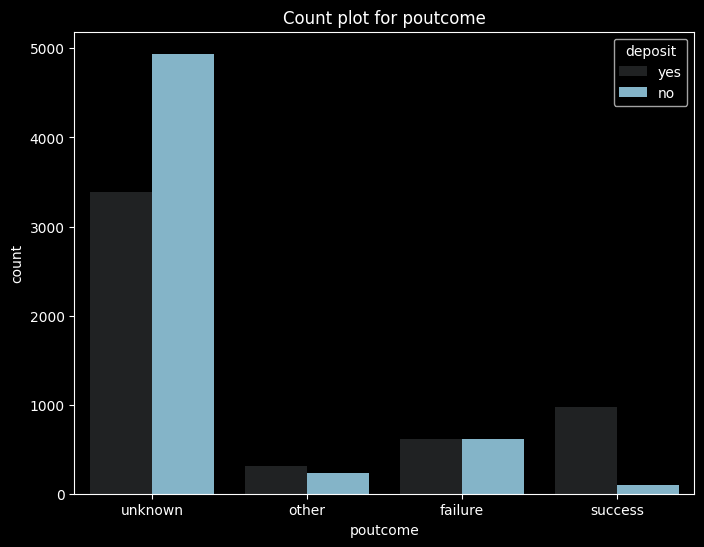

C:\Users\dell\AppData\Local\Temp\ipykernel_6428\1259065429.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)


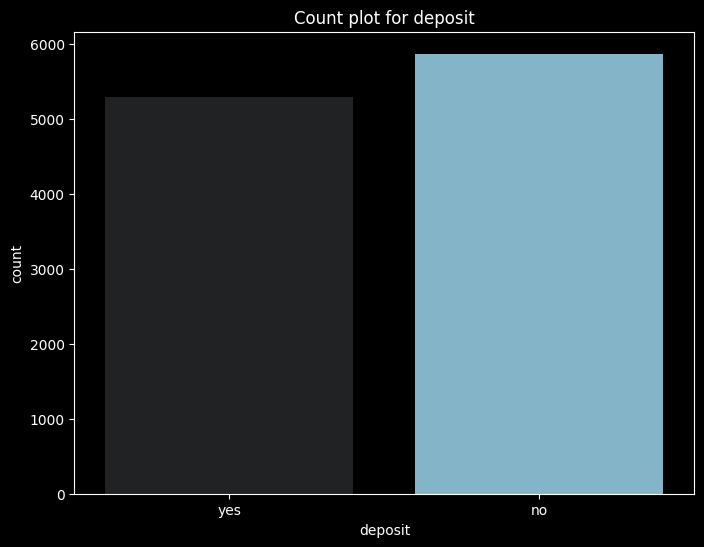

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        if col == "job" or col == "month":
            continue
        df[col].value_counts()
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, hue='deposit', data=df, color='skyblue', alpha=0.9)
        plt.title(f'Count plot for {col}')
        plt.style.use('dark_background')
        plt.show()


# <span style="color:skyblue"> Encoding & Scaling </span>

In [14]:
for col in df.columns:
    if df[col].dtype == "object":
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    elif df[col].dtype != "object":
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3,1
3,1.155733,7,1,1,0,0.293762,1,0,2,-1.265746,8,0.596366,-0.554168,-0.481184,-0.36326,3,1
4,1.071790,0,1,2,0,-0.416876,0,0,2,-1.265746,8,0.867171,-0.186785,-0.481184,-0.36326,3,1


<Axes: >

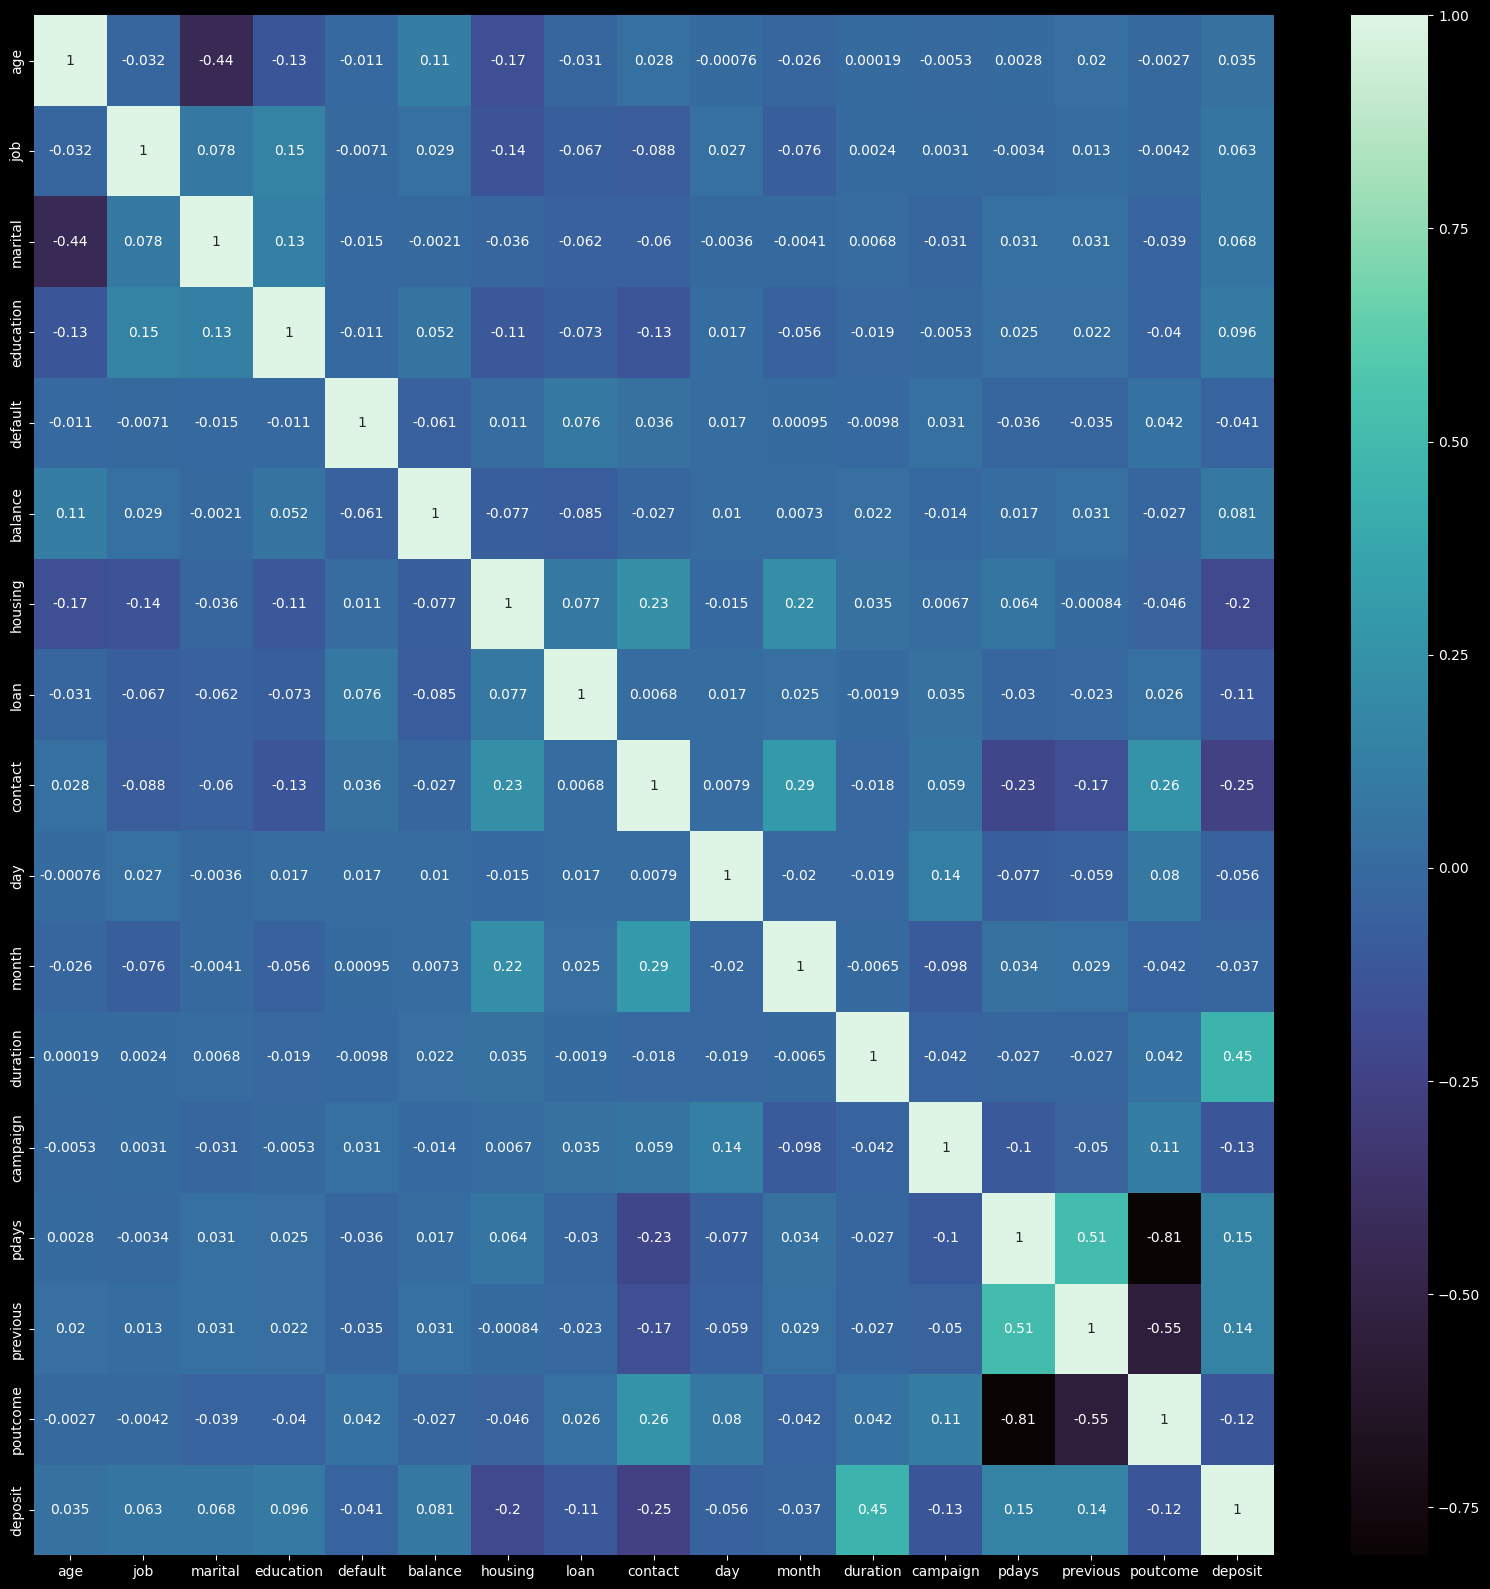

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap = "mako")

# <span style="color:skyblue">Splitting the data into training data & Test data</span>

In [16]:
X = df.drop(columns=['deposit'],axis=1)
Y = df["deposit"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

# <span style="color:skyblue">Model Building : Logistic Regression</span>

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# <span style="color:skyblue">Model Evaluation</span>

In [19]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[1 0 1 ... 0 1 1]


In [20]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7979616978385038


In [21]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 1 1 ... 0 1 0]


In [22]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7895208240035826


In [23]:
print(f"Training accuracy : {model.score(X_train, Y_train)}")
print(f"Test accuracy {model.score(X_test, Y_test)}")

Training accuracy : 0.7979616978385038
Test accuracy 0.7895208240035826


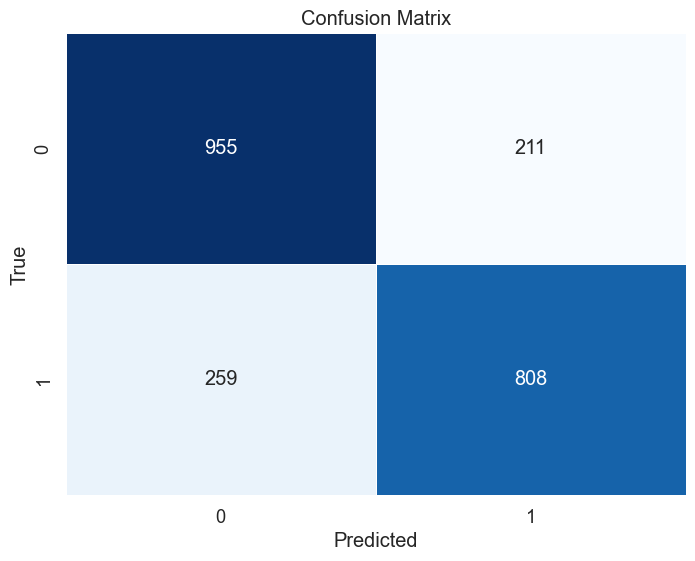

In [25]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

# <span style="color:skyblue">Model Building : Decision Tree </span>

In [26]:
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR 

tree_clf1 = DTC()
tree_clf1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
print(f"Training accuracy : {tree_clf1.score(X_train, Y_train)}")
print(f"Test accuracy {tree_clf1.score(X_test, Y_test)}")

Training accuracy : 1.0
Test accuracy 0.767577250335871


In [28]:
path = tree_clf1.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
models = []
for i, ccp_alpha in enumerate(ccp_alphas):
    model = DTC(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, Y_train)
    print(f"Accuracy with pruning #{i+1}:", model.score(X_test, Y_test))
    models.append(model)


Accuracy with pruning #1: 0.7639946260635916
Accuracy with pruning #2: 0.7639946260635916
Accuracy with pruning #3: 0.7639946260635916
Accuracy with pruning #4: 0.7626511419614868
Accuracy with pruning #5: 0.7626511419614868
Accuracy with pruning #6: 0.7626511419614868
Accuracy with pruning #7: 0.7630989699955217
Accuracy with pruning #8: 0.7630989699955217
Accuracy with pruning #9: 0.7630989699955217
Accuracy with pruning #10: 0.7630989699955217
Accuracy with pruning #11: 0.7639946260635916
Accuracy with pruning #12: 0.7639946260635916
Accuracy with pruning #13: 0.7644424540976265
Accuracy with pruning #14: 0.7644424540976265
Accuracy with pruning #15: 0.7644424540976265
Accuracy with pruning #16: 0.7648902821316614
Accuracy with pruning #17: 0.7648902821316614
Accuracy with pruning #18: 0.7648902821316614
Accuracy with pruning #19: 0.7648902821316614
Accuracy with pruning #20: 0.7653381101656964
Accuracy with pruning #21: 0.7657859381997313
Accuracy with pruning #22: 0.76578593819973

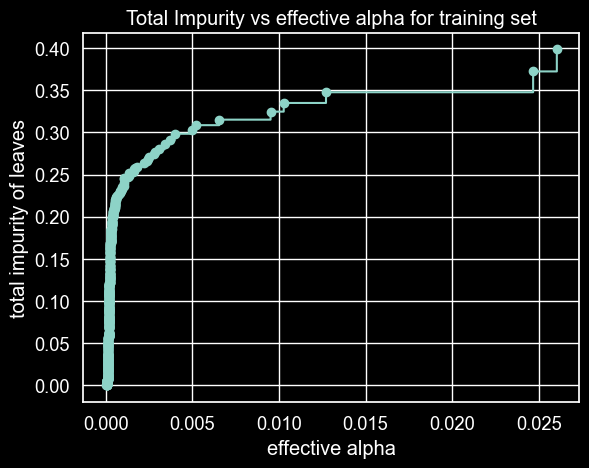

In [30]:
path = tree_clf1.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.style.use('dark_background') 

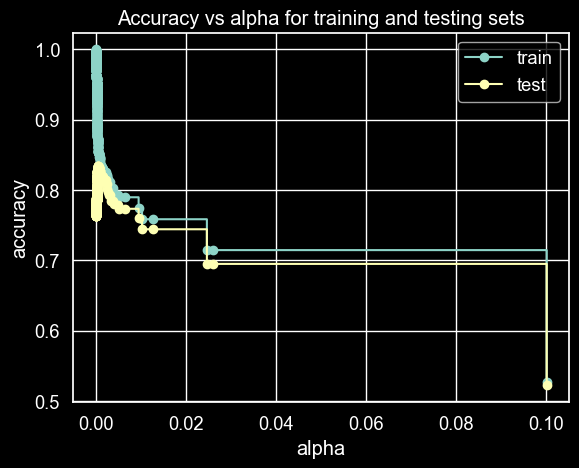

In [31]:
train_scores = [clf.score(X_train, Y_train) for clf in models]
test_scores = [clf.score(X_test, Y_test) for clf in models]

# Trim ccp_alphas to match the number of models
ccp_alphas_trimmed = ccp_alphas[:len(models)]

# Plotting
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_trimmed, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_trimmed, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.style.use('dark_background') 
plt.show()


In [35]:
tree_clf2 = DTC(ccp_alpha=0.0006)

tree_clf2.fit(X_train, Y_train)

y_pred_dt = tree_clf2.predict(X_test)

print(f"Traning Accuracy: {tree_clf2.score(X_train, Y_train)}")
print(f"Testing Accuracy: {tree_clf2.score(X_test, Y_test)}") 

Traning Accuracy: 0.8541829992160376
Testing Accuracy: 0.8311688311688312


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

Y_train_pred = tree_clf2.predict(X_train)
Y_test_pred = tree_clf2.predict(X_test)

precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)

precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)

print("Training Metrics:")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")

print("\nTest Metrics:")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")

Training Metrics:
Precision: 0.8344021988089785
Recall: 0.8628612032212222
F1-score: 0.8483931066604564

Test Metrics:
Precision: 0.8170955882352942
Recall: 0.8331771321462043
F1-score: 0.8250580046403713
